In [1]:
import numpy as np
import matplotlib.pyplot as plt


enter the parameters

In [2]:
message_frequency = 10
carrier_frequency = 20
sampling_frequency = 30 * carrier_frequency
duration = 4 / carrier_frequency  # number of cycles to generate

 Generate time vector

In [3]:
t = np.arange(0, duration, 1 / sampling_frequency)
print(len(t))

120


Generate message signal 

[-2, -2, 1, -2]


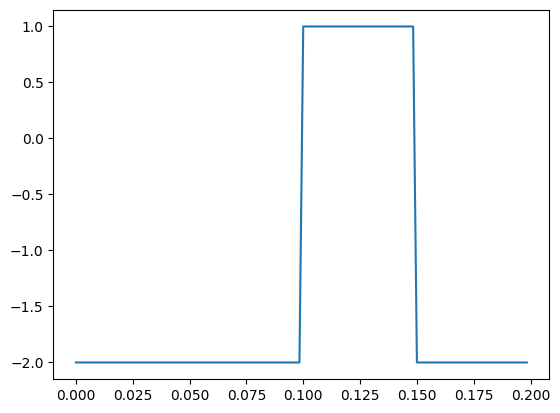

In [4]:
message_bits=np.random.randint(0,2,4)
message_list = [-2 if bit == 0 else 1 for bit in message_bits]
print(message_list)
message=[]
for i in message_list:
    for j in range(0,30):
        message.append(i)
plt.plot(t,message)

Generate carrier signal

ValueError: x and y must have same first dimension, but have shapes (120,) and (4000,)

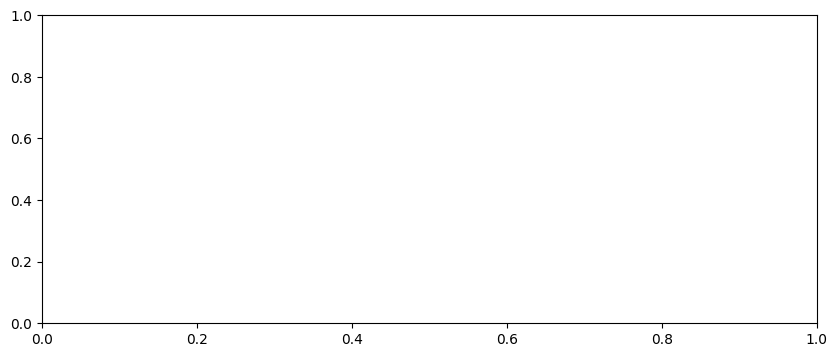

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters
sampling_rate = 1000  # Samples per second
duration = 4          # Duration in seconds
freq1 = 5             # Frequency for the first quarter in Hz
freq2 = 10            # Frequency for the second quarter in Hz
freq3 = 15            # Frequency for the third quarter in Hz
freq4 = 20            # Frequency for the fourth quarter in Hz

# Time array
tn = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

# Calculate the number of samples in each quarter
quarter_point = len(tn) // 4

# Create the sine wave for each quarter
y1 = np.sin(2 * np.pi * freq1 * tn[:quarter_point])
y2 = np.sin(2 * np.pi * freq2 * tn[quarter_point:2*quarter_point])
y3 = np.sin(2 * np.pi * freq3 * tn[2*quarter_point:3*quarter_point])
y4 = np.sin(2 * np.pi * freq4 * tn[3*quarter_point:])

# Concatenate the four quarters
y = np.concatenate((y1, y2, y3, y4))

# Plot the sine wave
plt.figure(figsize=(10, 4))
plt.plot(t, y)
plt.title("Sine Wave with Four Different Frequencies")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()


generation of modulated signal

120
120


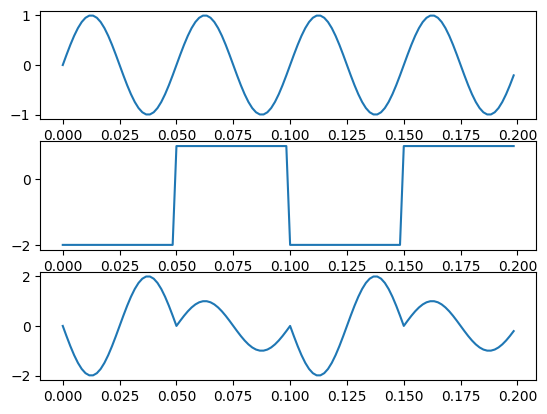

In [ ]:
carrier = np.sin(2 * np.pi * carrier_frequency * t)
print(len(carrier))
modulated_signal = carrier * message
print(len(modulated_signal))
plt.subplot(3, 1, 1)
plt.plot(t, carrier)
plt.subplot(3, 1, 2)
plt.plot(t, message)
plt.subplot(3, 1, 3)
plt.plot(t, modulated_signal)

BER vs EbN0 GRAPH

Monte Carlo Simulation for BER calculation

In [ ]:
N = 500000  # Number of bits
EbN0dB_list = np.arange(0, 14)  # Range of Eb/N0 values in dB
print(EbN0dB_list)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]


In [1]:
BER = []  # Bit Error Rate
X=[]
Y=[]

# Loop over each Eb/N0 value
for EbN0dB in EbN0dB_list:
    EbN0 = 10**(EbN0dB / 10)  # Convert dB to linear scale
    noise_std_dev = 1 / np.sqrt(2 * EbN0)  # Calculate noise standard deviation

     # Add Gaussian noise
    noise = noise_std_dev * np.random.randn(N)
    
    # Generate random BPSK symbols (-1 or +1)
    x = 2 * (np.random.rand(N) >= 0.5) - 1
    X.append(x)
    

    received = x + noise
    
    # Detect the received symbols (threshold at 0)
    received_x = 2 * (received >= 0) - 1
    Y.append(received_x)
    
    # Calculate the number of bit errors
    errors = (x != received_x).sum()
    BER.append(errors / N)
print(len(BER))
print(X)
print(Y)

# Plot BER vs Eb/N0
plt.figure(figsize=(10, 6))
plt.plot(EbN0dB_list, BER, "go-", label="Simulated BER")
plt.xscale('linear')
plt.yscale('log')
plt.grid(True, which='both')
plt.xlabel("Eb/N0 (dB)")
plt.ylabel("BER")
plt.title("BER vs Eb/N0 for BPSK")
plt.legend()
plt.show()


NameError: name 'EbN0dB_list' is not defined